# Exploratory Data Analysis Starter

## Import packages

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

# Shows plots in jupyter notebook
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

# Set plot style
sns.set(color_codes=True)
sns.set_style('whitegrid')

---

## Loading data with Pandas

We need to load `client_data.csv` and `price_data.csv` into individual dataframes so that we can work with them in Python. For this notebook and all further notebooks, it will be assumed that the CSV files will the placed in the same file location as the notebook. If they are not, please adjust the directory within the `read_csv` method accordingly.

In [2]:
client_df = pd.read_csv('./client_data.csv')
price_df = pd.read_csv('./price_data.csv')

You can view the first 3 rows of a dataframe using the `head` method. Similarly, if you wanted to see the last 3, you can use `tail(3)`

## CLIENT DATASET

In [3]:
client_df.head(3)

,id,channel_sales,cons_12m,cons_gas_12m,cons_last_month,date_activ,date_end,date_modif_prod,date_renewal,forecast_cons_12m,...,has_gas,imp_cons,margin_gross_pow_ele,margin_net_pow_ele,nb_prod_act,net_margin,num_years_antig,origin_up,pow_max,churn
0,24011ae4ebbe3035111d65fa7c15bc57,foosdfpfkusacimwkcsosbicdxkicaua,0,54946,0,2013-06-15,2016-06-15,2015-11-01,2015-06-23,0.00,...,t,0.0,25.44,25.44,2,678.99,3,lxidpiddsbxsbosboudacockeimpuepw,43.648,1
1,d29c2c54acc38ff3c0614d0a653813dd,MISSING,4660,0,0,2009-08-21,2016-08-30,2009-08-21,2015-08-31,189.95,...,f,0.0,16.38,16.38,1,18.89,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.800,0
2,764c75f661154dac3a6c254cd082ea7d,foosdfpfkusacimwkcsosbicdxkicaua,544,0,0,2010-04-16,2016-04-16,2010-04-16,2015-04-17,47.96,...,f,0.0,28.60,28.60,1,6.60,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.856,0


---

## Descriptive statistics of data

### Data types

It is useful to first understand the data that you're dealing with along with the data types of each column. The data types may dictate how you transform and engineer features.

To get an overview of the data types within a data frame, use the `info()` method.

In [4]:
client_df.info()

# No null values in any column

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14606 entries, 0 to 14605
Data columns (total 26 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              14606 non-null  object 
 1   channel_sales                   14606 non-null  object 
 2   cons_12m                        14606 non-null  int64  
 3   cons_gas_12m                    14606 non-null  int64  
 4   cons_last_month                 14606 non-null  int64  
 5   date_activ                      14606 non-null  object 
 6   date_end                        14606 non-null  object 
 7   date_modif_prod                 14606 non-null  object 
 8   date_renewal                    14606 non-null  object 
 9   forecast_cons_12m               14606 non-null  float64
 10  forecast_cons_year              14606 non-null  int64  
 11  forecast_discount_energy        14606 non-null  float64
 12  forecast_meter_rent_12m         

In [5]:
for col in ['date_activ','date_end','date_modif_prod','date_renewal']:
    client_df[col] = client_df[col].astype('datetime64[ns]')
    
client_df.dtypes

id                                        object
channel_sales                             object
cons_12m                                   int64
cons_gas_12m                               int64
cons_last_month                            int64
date_activ                        datetime64[ns]
date_end                          datetime64[ns]
date_modif_prod                   datetime64[ns]
date_renewal                      datetime64[ns]
forecast_cons_12m                        float64
forecast_cons_year                         int64
forecast_discount_energy                 float64
forecast_meter_rent_12m                  float64
forecast_price_energy_off_peak           float64
forecast_price_energy_peak               float64
forecast_price_pow_off_peak              float64
has_gas                                   object
imp_cons                                 float64
margin_gross_pow_ele                     float64
margin_net_pow_ele                       float64
nb_prod_act         

### Statistics

Now let's look at some statistics about the datasets. We can do this by using the `describe()` method.

In [6]:
client_df.describe()

,cons_12m,cons_gas_12m,cons_last_month,forecast_cons_12m,forecast_cons_year,forecast_discount_energy,forecast_meter_rent_12m,forecast_price_energy_off_peak,forecast_price_energy_peak,forecast_price_pow_off_peak,imp_cons,margin_gross_pow_ele,margin_net_pow_ele,nb_prod_act,net_margin,num_years_antig,pow_max,churn
count,1.460600e+04,1.460600e+04,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000
mean,1.592203e+05,2.809238e+04,16090.269752,1868.614880,1399.762906,0.966726,63.086871,0.137283,0.050491,43.130056,152.786896,24.565121,24.562517,1.292346,189.264522,4.997809,18.135136,0.097152
std,5.734653e+05,1.629731e+05,64364.196422,2387.571531,3247.786255,5.108289,66.165783,0.024623,0.049037,4.485988,341.369366,20.231172,20.230280,0.709774,311.798130,1.611749,13.534743,0.296175
min,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,3.300000,0.000000
25%,5.674750e+03,0.000000e+00,0.000000,494.995000,0.000000,0.000000,16.180000,0.116340,0.000000,40.606701,0.000000,14.280000,14.280000,1.000000,50.712500,4.000000,12.500000,0.000000
50%,1.411550e+04,0.000000e+00,792.500000,1112.875000,314.000000,0.000000,18.795000,0.143166,0.084138,44.311378,37.395000,21.640000,21.640000,1.000000,112.530000,5.000000,13.856000,0.000000
75%,4.076375e+04,0.000000e+00,3383.000000,2401.790000,1745.750000,0.000000,131.030000,0.146348,0.098837,44.311378,193.980000,29.880000,29.880000,1.000000,243.097500,6.000000,19.172500,0.000000
max,6.207104e+06,4.154590e+06,771203.000000,82902.830000,175375.000000,30.000000,599.310000,0.273963,0.195975,59.266378,15042.790000,374.640000,374.640000,32.000000,24570.650000,13.000000,320.000000,1.000000


In [7]:
client_df.describe(include='object')

,id,channel_sales,has_gas,origin_up
count,14606,14606,14606,14606
unique,14606,8,2,6
top,24011ae4ebbe3035111d65fa7c15bc57,foosdfpfkusacimwkcsosbicdxkicaua,f,lxidpiddsbxsbosboudacockeimpuepw
freq,1,6754,11955,7097


# EDA ON CLIENT DATA
#### We shall be dividing the features into these categories and perform descriptive analysis on each
#### 1) CLIENT BASIC INFO --> 'id','channel_sales', 'origin_up','churn', 'nb_prod_act','num_years_antig','has_gas'
#### 2) PAST CONSUMPTION --> 'cons_12m', 'cons_gas_12m', 'cons_last_month'
#### 3) DATE COLUMNS --> 'date_activ','date_end', 'date_modif_prod', 'date_renewal'
#### 4) FORECAST COLUMNS --> 'forecast_cons_12m','forecast_price_energy_off_peak', 'forecast_price_energy_peak', 'forecast_price_pow_off_peak', 'forecast_discount_energy','forecast_meter_rent_12m'
#### 5) PRESENT CONSUMPTION --> 'imp_cons','pow_max', 'margin_gross_pow_ele', 'margin_net_pow_ele','net_margin'

#### We will be using barplot to analyze distribution of categorical features with respect to target (churn) and histogram / boxplot for numerical features

---

## Data visualization

If you're working in Python, two of the most popular packages for visualization are `matplotlib` and `seaborn`. We highly recommend you use these, or at least be familiar with them because they are ubiquitous!

Below are some functions that you can use to get started with visualizations. 

The first function `plot_stacked_bars` is used to plot a stacked bar chart. An example of how you could use this is shown below:

The second function `annotate_bars` is used by the first function, but the third function `plot_distribution` helps you to plot the distribution of a numeric column. An example of how it can be used is given below:

In [8]:
def plot_stacked_bars(dataframe, title_, size_=(18, 10), rot_=0, legend_="upper right"):
    """
    Plot stacked bars with annotations
    """
    ax = dataframe.plot(
        kind="bar",
        stacked=True,
        figsize=size_,
        rot=rot_,
        title=title_
    )

    # Annotate bars
    annotate_stacked_bars(ax, textsize=14)
    # Rename legend
    plt.legend(["Retention", "Churn"], loc=legend_)
    # Labels
    plt.ylabel("Company base (%)")
    plt.show()

def annotate_stacked_bars(ax, pad=0.99, colour="white", textsize=13):
    """
    Add value annotations to the bars
    """

    # Iterate over the plotted rectanges/bars
    for p in ax.patches:
        
        # Calculate annotation
        value = str(round(p.get_height(),1))
        # If value is 0 do not annotate
        if value == '0.0':
            continue
        ax.annotate(
            value,
            ((p.get_x()+ p.get_width()/2)*pad-0.05, (p.get_y()+p.get_height()/2)*pad),
            color=colour,
            size=textsize
        )

def plot_distribution(dataframe, column, ax, bins_=50):
    """
    Plot variable distirbution in a stacked histogram of churned or retained company
    """
    # Create a temporal dataframe with the data to be plot
    temp = pd.DataFrame({"Retention": dataframe[dataframe["churn"]==0][column],
    "Churn":dataframe[dataframe["churn"]==1][column]})
    # Plot the histogram
    temp[["Retention","Churn"]].plot(kind='hist', bins=bins_, ax=ax, stacked=True)
    # X-axis label
    ax.set_xlabel(column)
    # Change the x-axis to plain style
    ax.ticklabel_format(style='plain', axis='x')

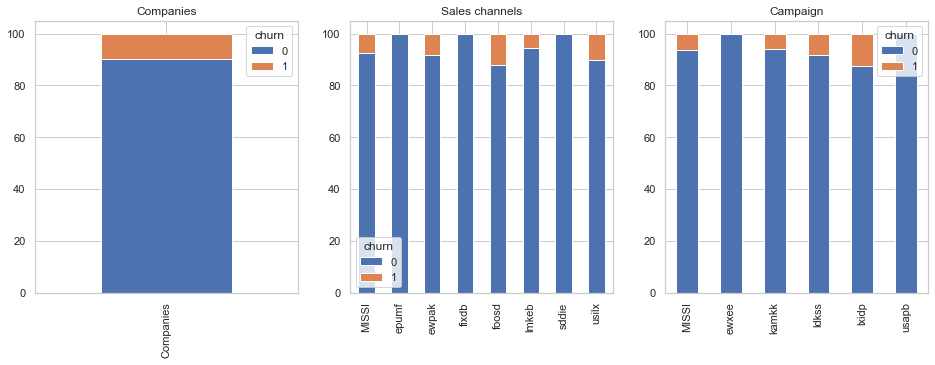

In [9]:
client_info = client_df[['id','channel_sales', 'origin_up','churn']]
client_info.columns = ['Companies', 'Sales channels', 'Campaign', 'churn']

fig, axes = plt.subplots(1, 3, figsize=(16,5))
i = 0

churn_total = client_info.groupby(client_info['churn'])[['Companies']].count()
churn_percentage = churn_total / churn_total.sum() * 100
churn_percentage.transpose().plot.bar(ax=axes.flat[i], stacked=True)
axes.flat[i].set_title('Companies')

for col in ['Sales channels', 'Campaign']:  
    i=i+1
    churn_percentage = client_info.groupby(client_info[col])['churn'].value_counts(normalize=True)*100
    df_churn = churn_percentage.unstack()
    df_churn.index = [x[:5] for x in df_churn.index]
    df_churn.plot.bar(ax=axes.flat[i], stacked=True)
    axes.flat[i].set_title(col)
plt.show()

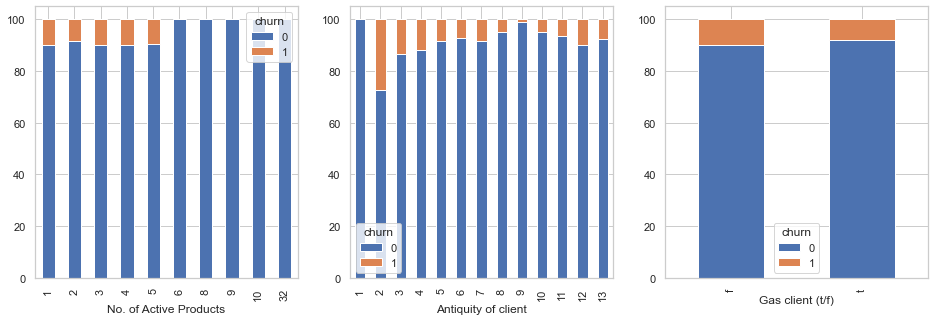

In [10]:
client_info = client_df[['nb_prod_act','num_years_antig','has_gas','churn']]
client_info.columns = ['No. of Active Products', 'Antiquity of client', 'Gas client (t/f)', 'churn']

fig, axes = plt.subplots(1, 3, figsize=(16,5))
i = 0

for col in ['No. of Active Products', 'Antiquity of client', 'Gas client (t/f)']:  
    churn_percentage = client_info.groupby(client_info[col])['churn'].value_counts(normalize=True)*100
    df_churn = churn_percentage.unstack()
    df_churn.plot.bar(ax=axes.flat[i], stacked=True)
    i=i+1
plt.show()

### KEY FINDINGS FROM EDA

#### 1. Data is heavily imbalanced with only 10% of churn cases
#### 2. Clients from certain sales channels and campaigns are more prone to churn. This is something that needs to be investigated with more data
#### 3. Clients with more no of active products (>=6) are less likely to churn than those with less than 6 active products
#### 4. Recently subscribed clients have a higher chance of churning except for the last one year. 
#### 5. Also, gas clients have a slightly lesser chance of churning (5-10%) than non-gas subscribers

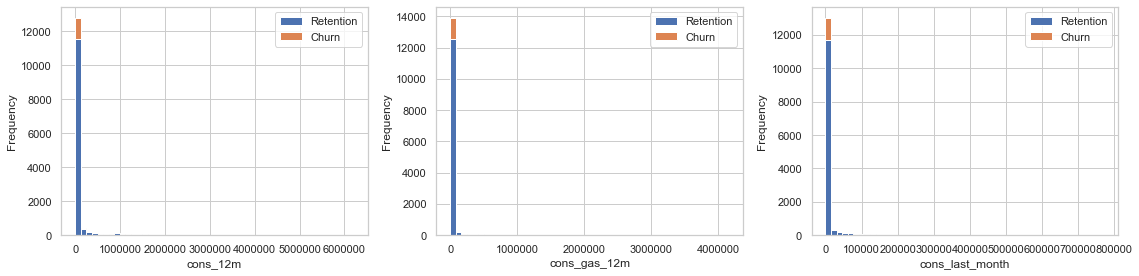

In [11]:
## PAST CONSUMPTION VARIABLES

consumption = client_df[['cons_12m', 'cons_gas_12m', 'cons_last_month', 'churn']]

# Plot the distribution of the variables with stacked histogram for different values of churn
fig, axes = plt.subplots(1,3, figsize=(16, 4), sharey=False)

i=0
for col in ['cons_12m', 'cons_gas_12m', 'cons_last_month']:
    plot_distribution(consumption, col, axes.flat[i], bins_=50)
    i=i+1

plt.tight_layout()
plt.show()

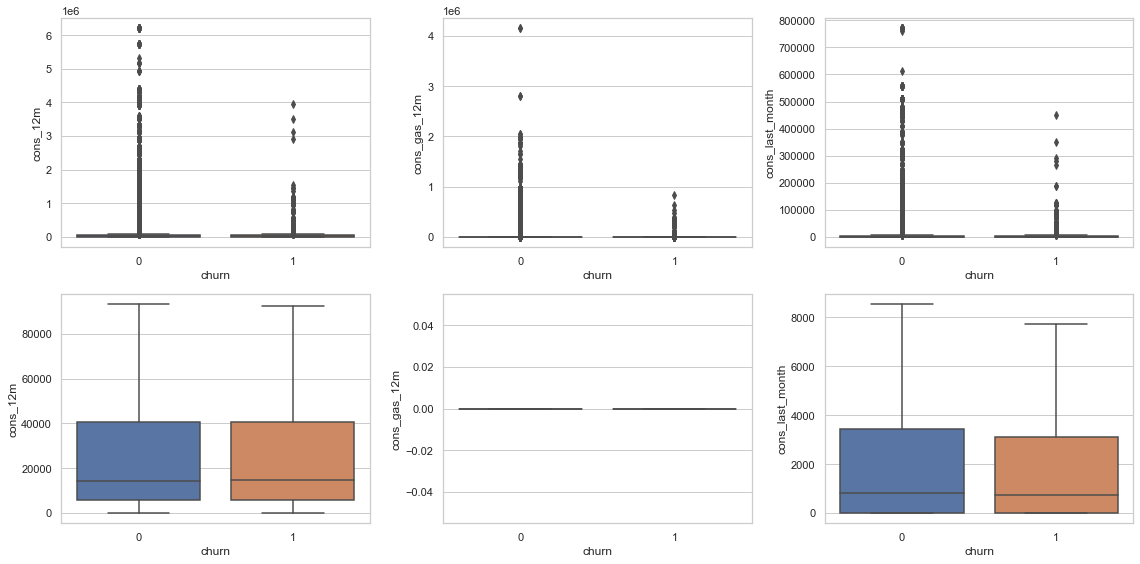

In [12]:
# Boxplots with and without outliers will help us to visualize the relation between the variable and churn

fig, axes = plt.subplots(2,3, figsize=(16, 8), sharey=False)

i=0
for col in ['cons_12m', 'cons_gas_12m', 'cons_last_month']:
    sns.boxplot(data=consumption, x='churn', y=col, showfliers=True, ax=axes.flat[i])
    sns.boxplot(data=consumption, x='churn', y=col, showfliers=False, ax=axes.flat[i+3])
    i=i+1

plt.tight_layout()
plt.show()

### KEY FINDINGS FROM EDA

#### 1. Consumption data is highly right skewed with many large outliers.
#### 2. No clear relation between consumption and churn is observed

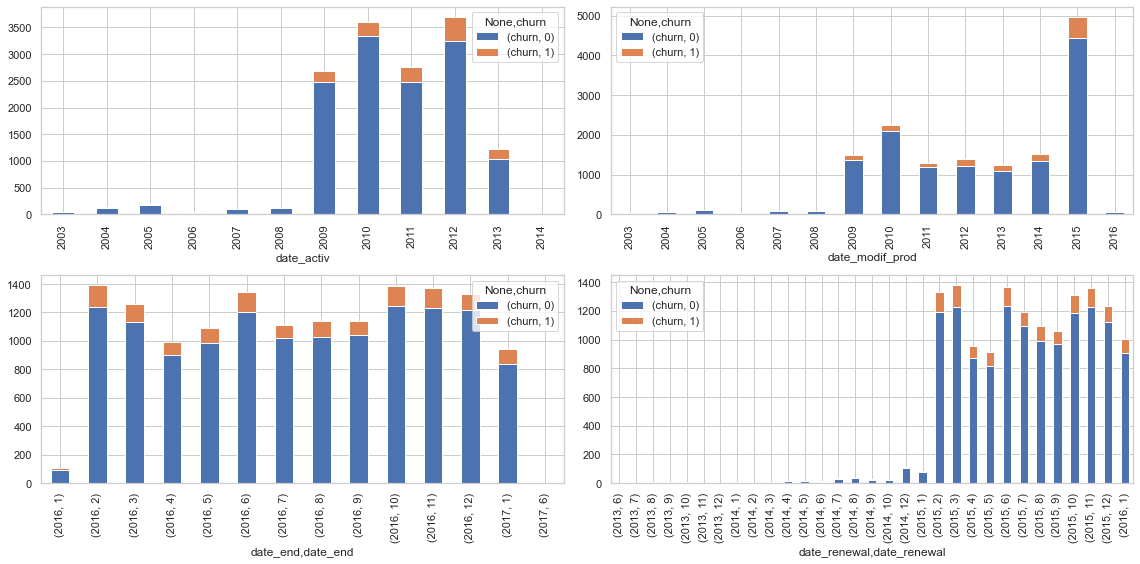

In [13]:
## DATE VARIABLES

dates = client_df[['date_activ','date_end', 'date_modif_prod', 'date_renewal','churn']]
fig, axes = plt.subplots(2,2, figsize=(16,8))
i = 0
for col in ['date_activ', 'date_modif_prod']:    
    df_date = dates[[col,'churn']].groupby([dates[col].dt.year])['churn'].value_counts().to_frame()
    df_date.unstack().plot(kind='bar', ax=axes.flat[i], stacked=True)
    i = i+1
for col in ['date_end', 'date_renewal']:
    df_date = dates[[col,'churn']].groupby([dates[col].dt.year,dates[col].dt.month])['churn'].value_counts().to_frame()
    df_date.unstack().plot(kind='bar', ax=axes.flat[i], stacked=True)
    i = i+1
plt.tight_layout()
plt.show()

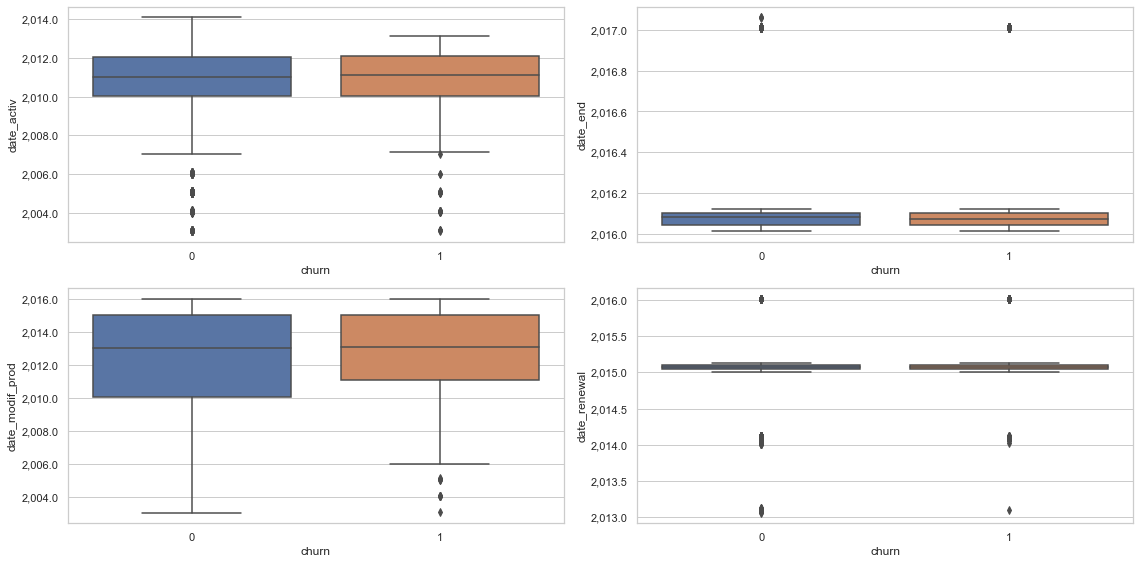

In [14]:
# To obtain the boxplot of datetime variables, we have to convert it to integer format

from matplotlib.ticker import StrMethodFormatter

fig, axes = plt.subplots(2,2, figsize=(16,8))

i=0
for col in ['date_activ','date_end', 'date_modif_prod', 'date_renewal']:
    dates[col] = dates[col].dt.strftime('%Y%m%d').astype('int64')/1e4
    sns.boxplot(data=dates, x=dates['churn'], y=col, showfliers=True, ax=axes.flat[i])
    axes.flat[i].yaxis.set_major_formatter(StrMethodFormatter('{x:,.1f}'))    
    i=i+1
    
plt.tight_layout()
plt.show()

### KEY FINDINGS FROM EDA

#### 1. Most of the clients are subscribed from 2009 onwards, although there are a few older clients as well
#### 2. No clear relation between date variables and churn is observed.

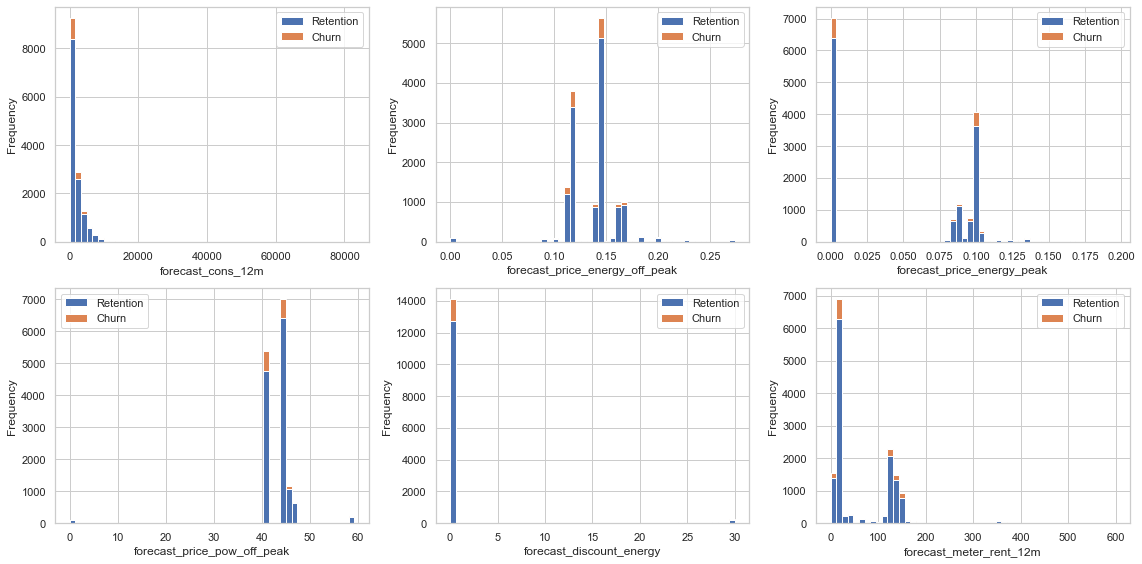

In [15]:
# FORECAST VARIABLES

forecast = client_df[['forecast_cons_12m','forecast_price_energy_off_peak', 'forecast_price_energy_peak','forecast_price_pow_off_peak', 
            'forecast_discount_energy','forecast_meter_rent_12m','churn']]

fig, axes = plt.subplots(2,3, figsize=(16,8))
i=0
for col in forecast.columns[:-1]:    
    plot_distribution(forecast, col, ax=axes.flat[i])
    i = i+1
plt.tight_layout()
plt.show()

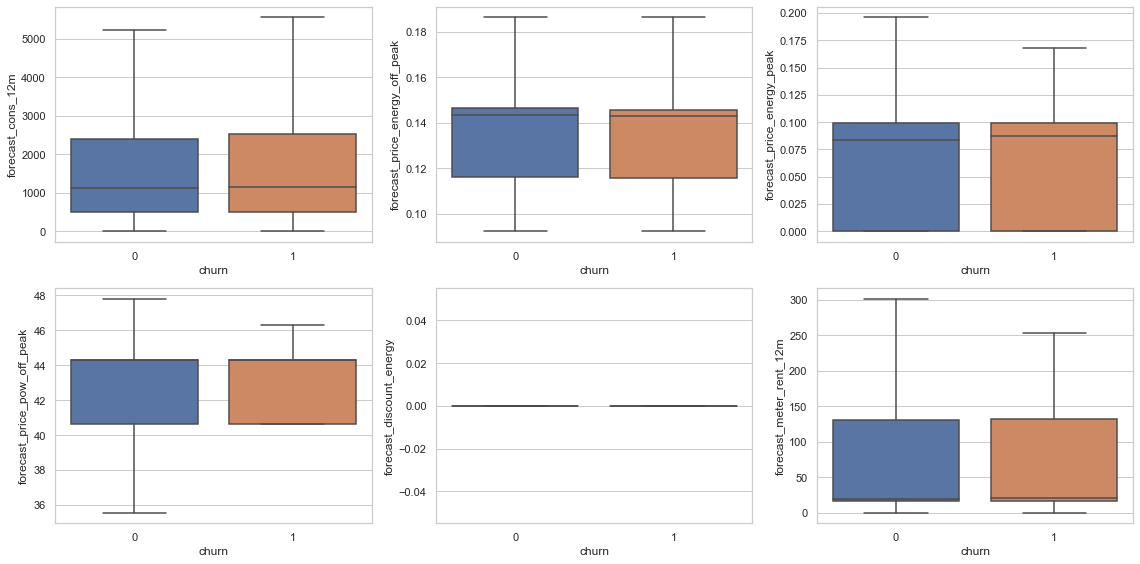

In [16]:
fig, axes = plt.subplots(2,3, figsize=(16,8))
i=0
for col in forecast.columns[:-1]:    
    sns.boxplot(data=forecast, x='churn', y=col, showfliers=False, ax=axes.flat[i])
    i = i+1
plt.tight_layout()
plt.show()

### KEY FINDINGS FROM EDA

#### 1. Variables are skewed with significant number of outliers.
#### 2. No clear relation is observed between forecast variables and churn. 

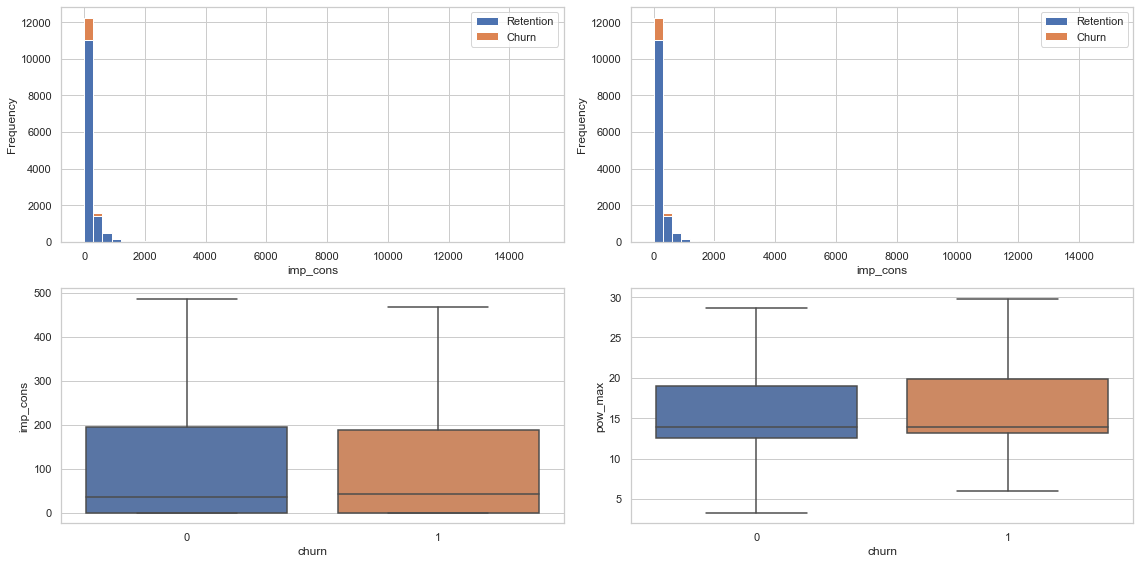

In [17]:
# PRESENT SUBSCRIPTION AND MARGIN

present = client_df[['imp_cons','pow_max','churn']]

fig, axes = plt.subplots(2,2, figsize=(16,8))
i = 0
for col in ['imp_cons','pow_max']:
    plot_distribution(present, 'imp_cons', axes.flat[i])
    sns.boxplot(data=present, x='churn', y=col, showfliers=False, ax=axes.flat[i+2])
    i=i+1
plt.tight_layout()
plt.show()

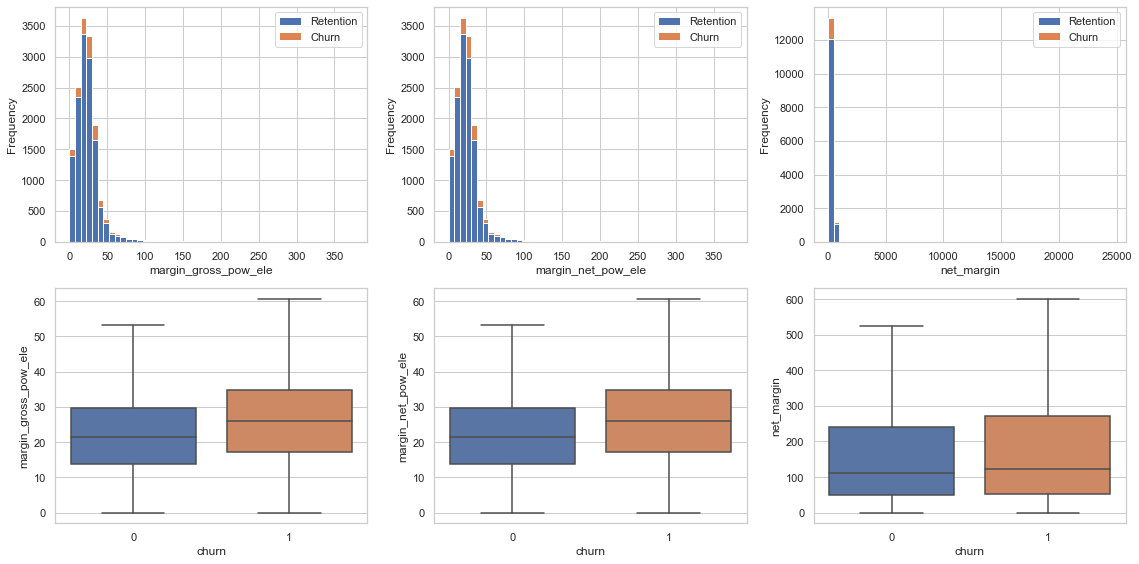

In [18]:
margin = client_df[['margin_gross_pow_ele', 'margin_net_pow_ele','net_margin','churn']]

fig, axes = plt.subplots(2,3, figsize=(16,8))
i = 0
for col in ['margin_gross_pow_ele', 'margin_net_pow_ele','net_margin']:
    plot_distribution(margin, col, axes.flat[i])
    sns.boxplot(data=margin, x='churn', y=col, showfliers=False, ax=axes.flat[i+3])
    i=i+1
plt.tight_layout()
plt.show()

### KEY FINDINGS FROM EDA

#### 1. All the variables are highly right skewed with significant outliers
#### 2. Pow_max has a slightly higher median value for churned clients
#### 3. Both gross and net margin variables have a higher median value for churned clients

## Correlation between features

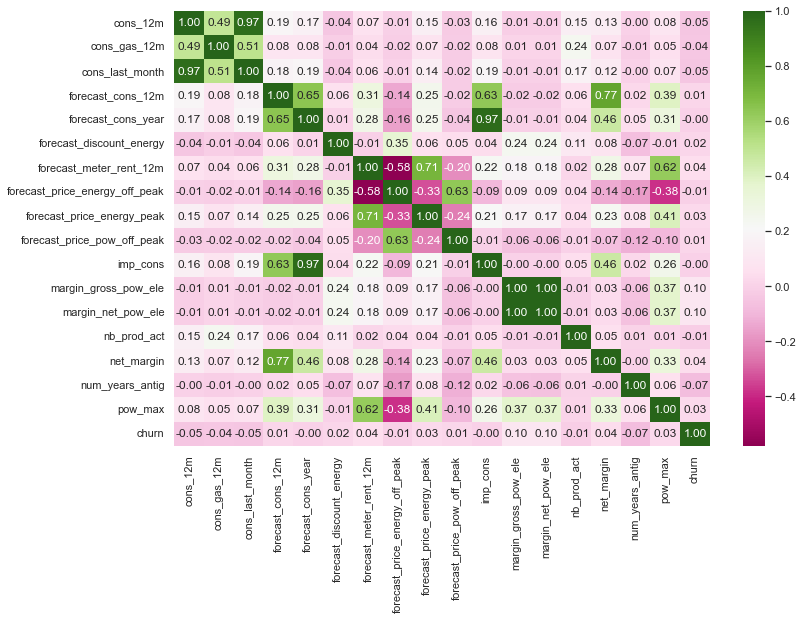

In [19]:
# Checking the correlation of numerical features

plt.figure(figsize = (12,8))
corr = client_df.corr()
sns.heatmap(corr, annot=True, fmt='.2f', cmap ='PiYG')
plt.show()

### KEY FINDINGS

#### Strongly positive correlated columns - cons_12m & cons_last_month, margin_gross_pow_ele and margin_net_power_ele,  imp_cons & forecast_cons_year (>90%)
#### Strongly negative correlated columns - forecast_meter_rent_12m & forecast_price_energy_off_peak (58%)

In [20]:
# Remove the highly correlated columns from the dataframe

client_df = client_df.drop(['cons_last_month','forecast_cons_year','margin_net_pow_ele'], axis=1)

## Outlier Treatment and Transformation

In [21]:
client_df_num = client_df.select_dtypes(np.number).drop('churn',axis=1) # excluding churn column
for col in client_df_num.columns:
    q1 = client_df_num[col].quantile(0.25)
    q3 = client_df_num[col].quantile(0.75)
    iqr = q3-q1
    df_out = client_df_num[(client_df_num[col]<q1-1.5*iqr)|(client_df_num[col]>q3+1.5*iqr)]
    perc_outliers = round(df_out.shape[0]/client_df_num.shape[0]*100, 2)
    print('For column {}, percentage of outliers is {}'.format(col, perc_outliers))

For column cons_12m, percentage of outliers is 14.27
For column cons_gas_12m, percentage of outliers is 17.88
For column forecast_cons_12m, percentage of outliers is 7.22
For column forecast_discount_energy, percentage of outliers is 3.51
For column forecast_meter_rent_12m, percentage of outliers is 1.04
For column forecast_price_energy_off_peak, percentage of outliers is 2.54
For column forecast_price_energy_peak, percentage of outliers is 0.0
For column forecast_price_pow_off_peak, percentage of outliers is 2.36
For column imp_cons, percentage of outliers is 8.32
For column margin_gross_pow_ele, percentage of outliers is 4.52
For column nb_prod_act, percentage of outliers is 21.74
For column net_margin, percentage of outliers is 7.0
For column num_years_antig, percentage of outliers is 2.66
For column pow_max, percentage of outliers is 10.51


In [22]:
# Display the skewness of numerical columns

client_df_num.skew()

cons_12m                           5.997308
cons_gas_12m                       9.597530
forecast_cons_12m                  7.155853
forecast_discount_energy           5.155098
forecast_meter_rent_12m            1.505148
forecast_price_energy_off_peak    -0.119586
forecast_price_energy_peak        -0.014331
forecast_price_pow_off_peak       -4.998772
imp_cons                          13.198799
margin_gross_pow_ele               4.472632
nb_prod_act                        8.636878
net_margin                        36.569515
num_years_antig                    1.446214
pow_max                            5.786785
dtype: float64

### KEY FINDINGS
### 1. Consumption variables have a high percentage of outliers which may need to be removed/transformed
### 2. Also, many variables show high skew value (> 1) and some are even extreme (>10) which may require transformation

# EDA ON PRICE DATASET

In [23]:
price_df = pd.read_csv('price_data.csv')
price_df.head()

,id,price_date,price_off_peak_var,price_peak_var,price_mid_peak_var,price_off_peak_fix,price_peak_fix,price_mid_peak_fix
0,038af19179925da21a25619c5a24b745,2015-01-01,0.151367,0.0,0.0,44.266931,0.0,0.0
1,038af19179925da21a25619c5a24b745,2015-02-01,0.151367,0.0,0.0,44.266931,0.0,0.0
2,038af19179925da21a25619c5a24b745,2015-03-01,0.151367,0.0,0.0,44.266931,0.0,0.0
3,038af19179925da21a25619c5a24b745,2015-04-01,0.149626,0.0,0.0,44.266931,0.0,0.0
4,038af19179925da21a25619c5a24b745,2015-05-01,0.149626,0.0,0.0,44.266931,0.0,0.0


In [24]:
price_df.info()

# No null values in any column

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 193002 entries, 0 to 193001
Data columns (total 8 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   id                  193002 non-null  object 
 1   price_date          193002 non-null  object 
 2   price_off_peak_var  193002 non-null  float64
 3   price_peak_var      193002 non-null  float64
 4   price_mid_peak_var  193002 non-null  float64
 5   price_off_peak_fix  193002 non-null  float64
 6   price_peak_fix      193002 non-null  float64
 7   price_mid_peak_fix  193002 non-null  float64
dtypes: float64(6), object(2)
memory usage: 11.8+ MB


In [25]:
price_df.describe()

,price_off_peak_var,price_peak_var,price_mid_peak_var,price_off_peak_fix,price_peak_fix,price_mid_peak_fix
count,193002.000000,193002.000000,193002.000000,193002.000000,193002.000000,193002.000000
mean,0.141027,0.054630,0.030496,43.334477,10.622875,6.409984
std,0.025032,0.049924,0.036298,5.410297,12.841895,7.773592
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.125976,0.000000,0.000000,40.728885,0.000000,0.000000
50%,0.146033,0.085483,0.000000,44.266930,0.000000,0.000000
75%,0.151635,0.101673,0.072558,44.444710,24.339581,16.226389
max,0.280700,0.229788,0.114102,59.444710,36.490692,17.458221


In [26]:
price_df.describe(include='object')

,id,price_date
count,193002,193002
unique,16096,12
top,038af19179925da21a25619c5a24b745,2015-08-01
freq,12,16094


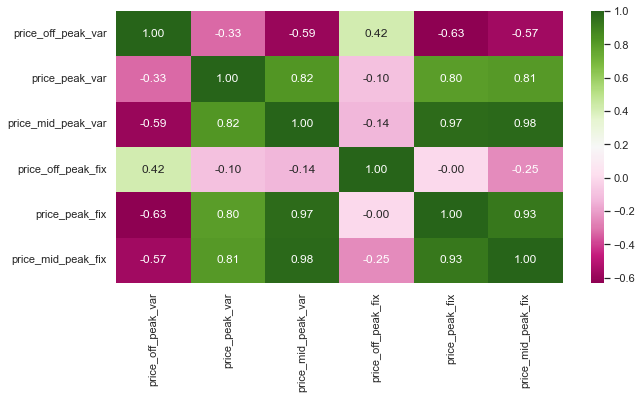

In [27]:
# Checking the correlation of numerical features

plt.figure(figsize = (10,5))
corr = price_df.corr()
sns.heatmap(corr, annot=True, fmt='.2f', cmap ='PiYG')
plt.show()

### KEY FINDINGS

#### Strongly positive correlated columns - Price_mid_peak_fix, Price_mid_peak_var, Price_peak_fix and Price_peak_var have a high correlation with each other (>80%)

#### Strongly negative correlated columns - price_peak_fix & price_off_peak_var (63%)

In [28]:
# Drop the highly correlated columns

price_df = price_df.drop(['price_mid_peak_fix','price_mid_peak_var'], axis=1)

In [29]:
# Since there are 16096 unique client ids in this data compared to 14606 in client_df, we have to perform left 
# join to get only the relevant records

client_prices = pd.merge(client_df[['id','churn']], price_df, how='left', on='id')

pd.set_option('display.max_rows', None)
client_prices.sort_values(by=['id','price_date']).head(10)

,id,churn,price_date,price_off_peak_var,price_peak_var,price_off_peak_fix,price_peak_fix
93438,0002203ffbb812588b632b9e628cc38d,0,2015-01-01,0.126098,0.103975,40.565969,24.339581
93439,0002203ffbb812588b632b9e628cc38d,0,2015-02-01,0.126098,0.103975,40.565969,24.339581
93440,0002203ffbb812588b632b9e628cc38d,0,2015-03-01,0.128067,0.105842,40.728885,24.437330
93441,0002203ffbb812588b632b9e628cc38d,0,2015-04-01,0.128067,0.105842,40.728885,24.437330
93442,0002203ffbb812588b632b9e628cc38d,0,2015-05-01,0.128067,0.105842,40.728885,24.437330
93443,0002203ffbb812588b632b9e628cc38d,0,2015-06-01,0.128067,0.105842,40.728885,24.437330
93444,0002203ffbb812588b632b9e628cc38d,0,2015-07-01,0.128067,0.105842,40.728885,24.437330
93445,0002203ffbb812588b632b9e628cc38d,0,2015-08-01,0.119906,0.101673,40.728885,24.437330
93446,0002203ffbb812588b632b9e628cc38d,0,2015-09-01,0.119906,0.101673,40.728885,24.437330
93447,0002203ffbb812588b632b9e628cc38d,0,2015-10-01,0.119906,0.101673,40.728885,24.437330


# PRICE SENSITIVITY ANALYSIS

### We will go with the following three approaches
### 1) Comparing the mean prices between Jan and Dec 2015 with the churn status
### 2) Comparing the price difference between Jan and Dec 2015 with the churn status
### 3) Comparing the variance prices between Jan and Dec 2015 with the churn status

### For each of the following we will use box plots for comparing the two categories (0 - not churned 1- churned)

In [30]:
# Calculate mean, difference and variance for off-peak prices

off_peak = client_prices[['id','price_date','price_off_peak_fix','price_off_peak_var','churn']]
off_peak_mean = off_peak.groupby(['id']).agg({'price_off_peak_fix': np.mean,'price_off_peak_var':np.mean})
off_peak_diff = off_peak.groupby(['id'])[['price_off_peak_fix','price_off_peak_var']].last() - off_peak.groupby(['id'])[['price_off_peak_fix','price_off_peak_var']].first()
off_peak_var = off_peak.groupby(['id']).agg({'price_off_peak_fix': np.var,'price_off_peak_var':np.var})
churn = off_peak.groupby('id')['churn'].mean()
off_peak_mean = pd.merge(off_peak_mean, churn, how='inner', on='id')
off_peak_diff = pd.merge(off_peak_diff, churn, how='inner', on='id')
off_peak_var = pd.merge(off_peak_var, churn, how='inner', on='id')

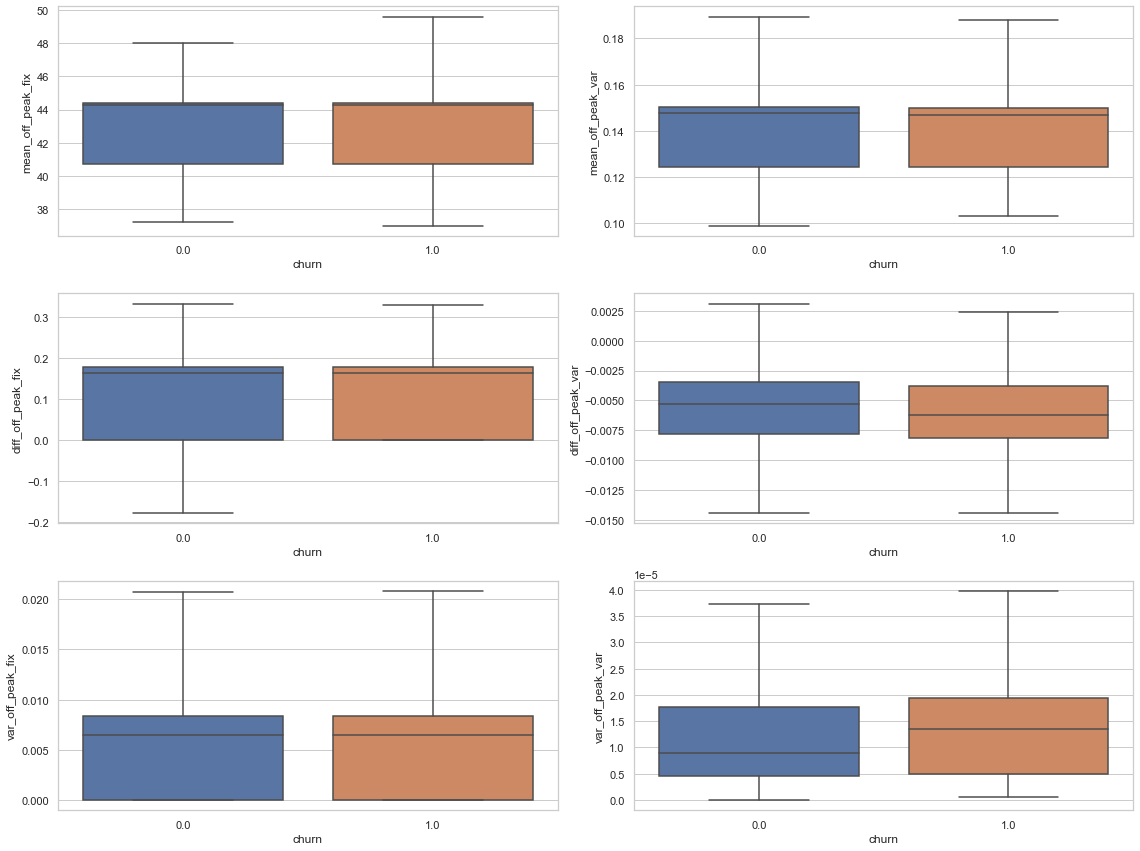

In [31]:
# Check the boxplots for estimated values of off peak prices

off_peak = pd.concat([off_peak_mean.iloc[:,:2], off_peak_diff.iloc[:,:2], off_peak_var], axis=1)
off_peak.columns = ['mean_off_peak_fix', 'mean_off_peak_var','diff_off_peak_fix','diff_off_peak_var','var_off_peak_fix','var_off_peak_var','churn']

fig, axes = plt.subplots(3,2, figsize=(16,12), sharey=False)
i=0
for col in off_peak.columns[:-1]:
    sns.boxplot(data=off_peak, x='churn', y=col, showfliers=False, ax=axes.flat[i])
    i=i+1
plt.tight_layout()
plt.show()

### KEY FINDINGS 

#### 1) Lower median off-peak price difference for churned clients
#### 2) Higher median off-peak price variance for churned clients

In [32]:
# Calculate mean, difference and variance for peak prices

peak = client_prices[['id','price_date','price_peak_fix','price_peak_var','churn']]
peak_mean = peak.groupby(['id']).agg({'price_peak_fix': np.mean,'price_peak_var':np.mean})
peak_diff = peak.groupby(['id'])[['price_peak_fix','price_peak_var']].last() - peak.groupby(['id'])[['price_peak_fix','price_peak_var']].first()
peak_var = peak.groupby(['id']).agg({'price_peak_fix': np.var,'price_peak_var':np.var})
churn = peak.groupby('id')['churn'].mean()
peak_mean = pd.merge(peak_mean, churn, how='inner', on='id')
peak_diff = pd.merge(peak_diff, churn, how='inner', on='id')
peak_var = pd.merge(peak_var, churn, how='inner', on='id')

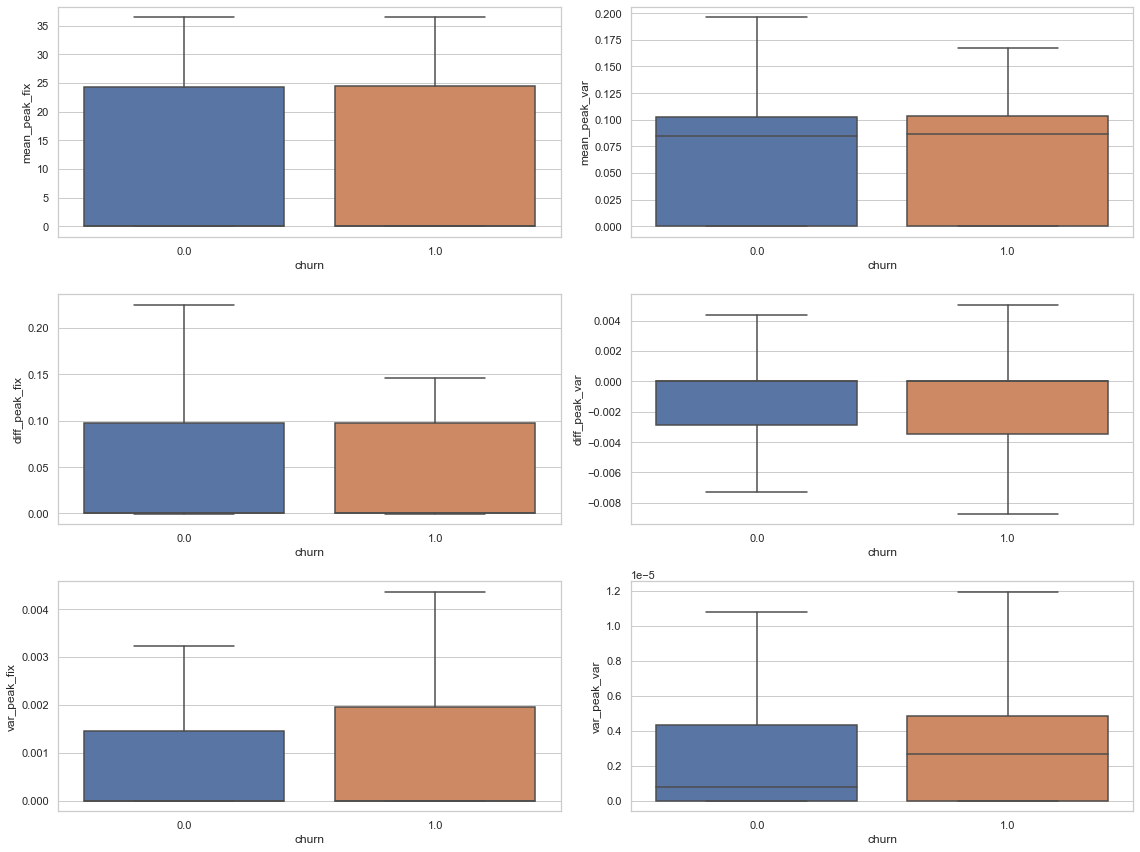

In [33]:
peak = pd.concat([peak_mean.iloc[:,:2], peak_diff.iloc[:,:2], peak_var], axis=1)
peak.columns = ['mean_peak_fix', 'mean_peak_var','diff_peak_fix','diff_peak_var','var_peak_fix','var_peak_var','churn']

# Checking boxplots of the above values
fig, axes = plt.subplots(3,2, figsize=(16,12), sharey=False)
i=0
for col in peak.columns[:-1]:
    sns.boxplot(data=peak, x='churn', y=col, showfliers=False, ax=axes.flat[i])
    i=i+1
plt.tight_layout()
plt.show()

### KEY FINDINGS 

#### 1) Higher median variance for peak variable prices. Other than that, there is no observed relation with churn

# CONCLUSION OF EDA & PRICE SENSITIVITY ANALYSIS

#### 1) Overall, we do not find strong support for the hypothesis that the change in prices have led to an increase in churn among some clients. However, further investigation & modelling may be necessary to confirm the observation

#### 2) Churn data for several clients whose historical price data is given to us, are not available. This lack of data may be influencing our observations.

#### 3) Also from the EDA analysis, we could observe that certain features like the antiquity of client and no of subscribed products strongly influence the churn rate. More data on these features maybe helpful to confirm these observations. Same goes for features like Campaign and Sales channel which requires further study

#### 4) For the mathematical modelling of this data, we can maybe neglect the columns which are found here to have almost no correlation with churning. Strong correlation between certain numerical features also means we can drop those columns. 

#### 5) Data set is heavily imbalanced with respect to the target variable (churn) with over 90% of instances representing a non-churn status (0). Various bias reduction strategies may have to be implemented during the modeling phase to ensure this doesn’t affect our predictions. 

In [34]:
# WRITE THE MERGED DATA FRAME OF CLIENT PRICES INTO A CSV FILE

client_df.to_csv('client_data_after_eda.csv', index=False)
price_df.to_csv('price_data_after_eda.csv', index=False)